### 1) loading the dataset

In [1]:
from translation_machine import dataset_mod,sentence_mod

import numpy as np
import torch

language_info = torch.load("../models/language_info.pth")

vocab_french = language_info["french"]["vocab"]
vocab_english = language_info["english"]["vocab"]

max_length_french = language_info["french"]["max_sentence_train_val"]
max_length_english = language_info["english"]["max_sentence_train_val"]


whole_dataset = dataset_mod.DatasetFromTxt("../data/french_english_dataset/fra.txt")

whole_dataset = list(dataset_mod.SentenceDataSet(whole_dataset,sentence_type_src=sentence_mod.EnglishSentence,sentence_type_dst=sentence_mod.FrenchSentence))

# Remark : the responsability to split the dataset is done outside of this notebook

idxs_train = np.arange(10)
np.save("../dataset_splitting/idx_overfitting.npy",idxs_train)
train_dataset = torch.utils.data.Subset(whole_dataset,idxs_train)
len(train_dataset)

/home/amine_ammor_91/miniconda3/envs/trans_mach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/amine_ammor_91/miniconda3/envs/trans_mach_env/lib/python3.10/site-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(
/home/amine_ammor_91/miniconda3/envs/trans_mach_env/lib/python3.10/site-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "fr" could not be loaded, trying "fr_core_news_sm" instead
  warnings.warn(


10

### 2) creation the vocabulary

In [2]:
from translation_machine import collate_fn_mod

import torch
from torch.utils.data import DataLoader
import numpy as np

max_eng_sentence,max_fr_sentence = np.max([len(el) for el,_ in train_dataset]),np.max([len(el) for _,el in train_dataset])

collate_fn = collate_fn_mod.get_collate_fn(max_eng_sentence,max_fr_sentence)

batch_size= 1

train_data_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)

In [3]:
from translation_machine import model_mod,model_bidirectionnal_mod



bidirectional_encoder = True
en_embeddings_size = 128
fr_embeddings_size = 128

hidden_size_encoder = 512

nb_directions = (2 if bidirectional_encoder else 1)

hidden_size_decoder = 512*nb_directions


model_inputs = {
    "embeddings_src_size":en_embeddings_size,
    "embeddings_tgt_size":fr_embeddings_size,
    "hidden_size_encoder":hidden_size_encoder,
    "hidden_size_decoder":hidden_size_decoder,
    "vocab_src":vocab_english,
    "vocab_tgt":vocab_french,
    "length_src_sentence":max_length_english,
    "length_tgt_sentence":max_length_french,
    "bidirectional_encoder":bidirectional_encoder
}

sequence_translator = model_bidirectionnal_mod.SequenceTranslator(**model_inputs)


In [4]:
from tqdm import tqdm
sequence_translator.train()
losses_train_and_weights = []
losses_val_and_weights = []

In [5]:
from torch import optim
from translation_machine import model_trainer

from torch import nn
from torch import nn
baseline_loss = nn.CrossEntropyLoss(reduction="sum")

optimizer = optim.NAdam(params=sequence_translator.parameters(),lr=0.3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model_trainer = model_trainer.ModelTrainer(sequence_translator,optimizer,scheduler,train_data_loader,train_data_loader,baseline_loss)


In [6]:
from pathlib import Path
import torch
load_from_backup = False
path_model_and_dependencies = "../models/sequence_translator_extended_overfitted.pth"

if load_from_backup and Path(path_model_and_dependencies).exists():
    back_up = torch.load(path_model_and_dependencies)
    sequence_translator.load_state_dict(back_up["model_params"])
    scheduler.load_state_dict(back_up["scheduler"])
    optimizer.load_state_dict(back_up["optimizer"])

    print("model loaded")

  0%|                                                                                   | 0/40 [00:00<?, ?it/s]

optimizing for epoch 0
training_step
0 0.010481542907655239
validation_step
0 0.04863082617521286
saving for epoch 0


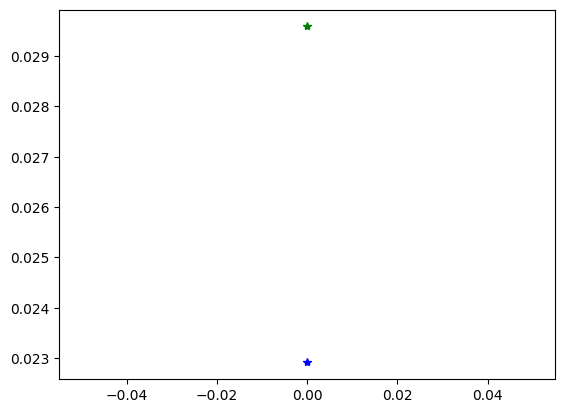

  2%|█▉                                                                         | 1/40 [00:04<02:50,  4.36s/it]

optimizing for epoch 1
training_step
0 0.02924112044274807
validation_step
0 0.014422694221138954
saving for epoch 1


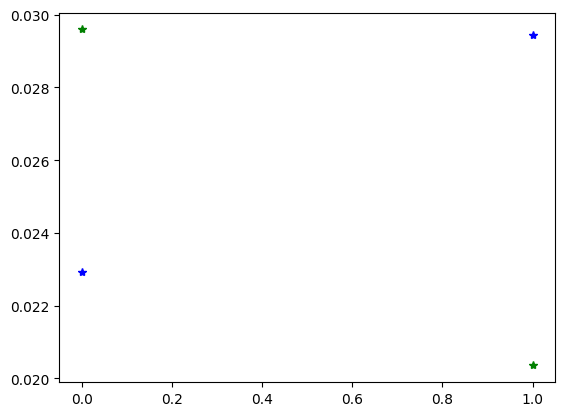

  5%|███▊                                                                       | 2/40 [00:07<02:26,  3.86s/it]

optimizing for epoch 2
training_step
0 0.00398680567741394
validation_step
0 0.0227027777582407
saving for epoch 2


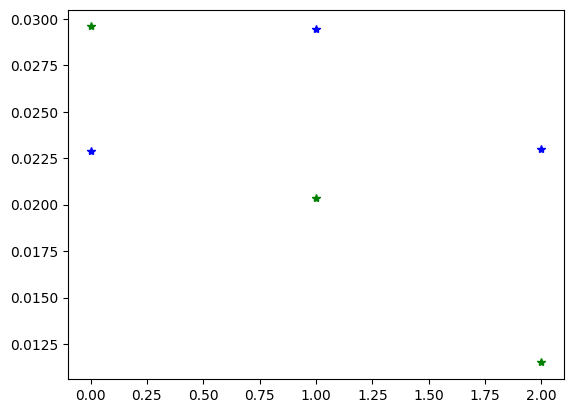

  8%|█████▋                                                                     | 3/40 [00:11<02:17,  3.72s/it]

optimizing for epoch 3
training_step
0 0.01702655665576458
validation_step
0 1.0723820720315302e-09
saving for epoch 3


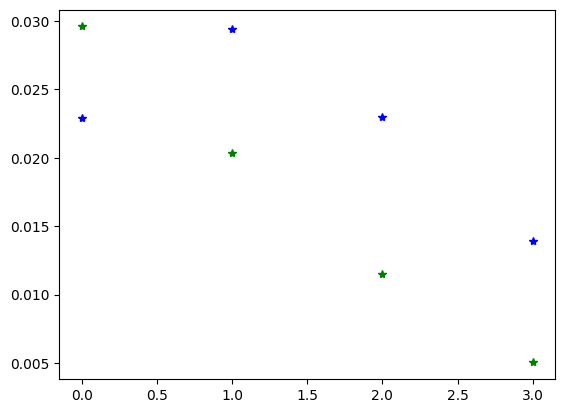

 10%|███████▌                                                                   | 4/40 [00:14<02:10,  3.62s/it]

optimizing for epoch 4
training_step
0 0.0
validation_step
0 0.0026684810873121023
saving for epoch 4


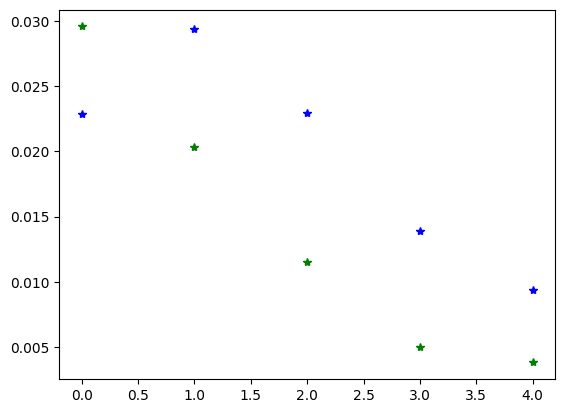

 12%|█████████▍                                                                 | 5/40 [00:18<02:05,  3.59s/it]

optimizing for epoch 5
training_step
0 0.0026684810873121023
validation_step
0 0.0


 15%|███████████▎                                                               | 6/40 [00:19<01:29,  2.64s/it]

optimizing for epoch 6
training_step
0 0.013247894123196602
validation_step
0 0.0
saving for epoch 6


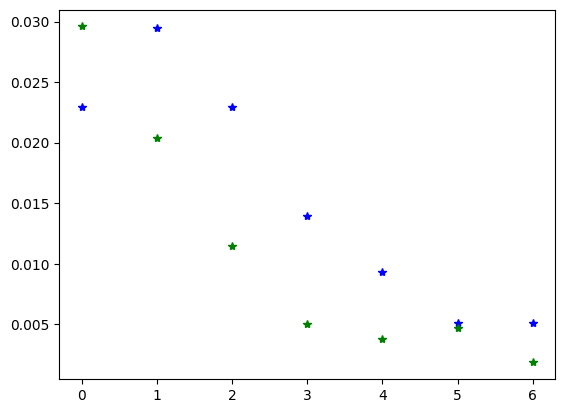

 18%|█████████████▏                                                             | 7/40 [00:22<01:35,  2.90s/it]

optimizing for epoch 7
training_step
0 0.003885082434862852
validation_step
0 0.0
saving for epoch 7


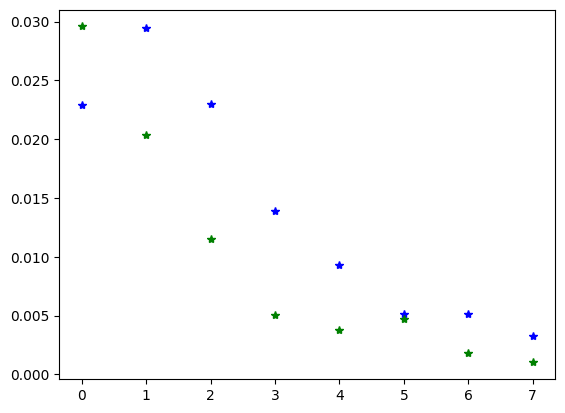

 20%|███████████████                                                            | 8/40 [00:26<01:38,  3.07s/it]

optimizing for epoch 8
training_step
0 8.03026267703899e-09


 22%|████████████████▉                                                          | 9/40 [00:26<01:12,  2.35s/it]

validation_step
0 0.0
optimizing for epoch 9
training_step
0 0.0
validation_step
0 0.0
saving for epoch 9


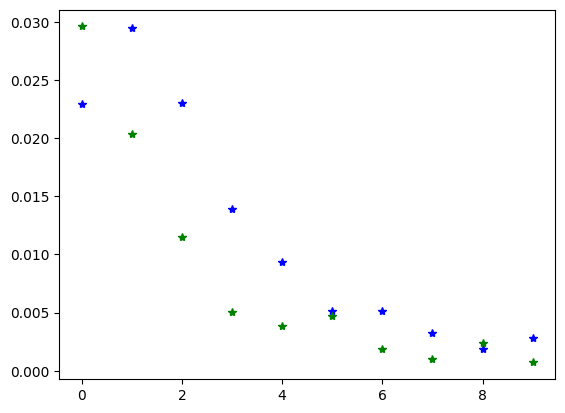

 25%|██████████████████▌                                                       | 10/40 [00:30<01:20,  2.68s/it]

optimizing for epoch 10
training_step
0 0.0


 28%|████████████████████▎                                                     | 11/40 [00:31<01:00,  2.09s/it]

validation_step
0 0.0
optimizing for epoch 11
training_step
0 0.0
validation_step
0 1.8454913153220787e-09
saving for epoch 11


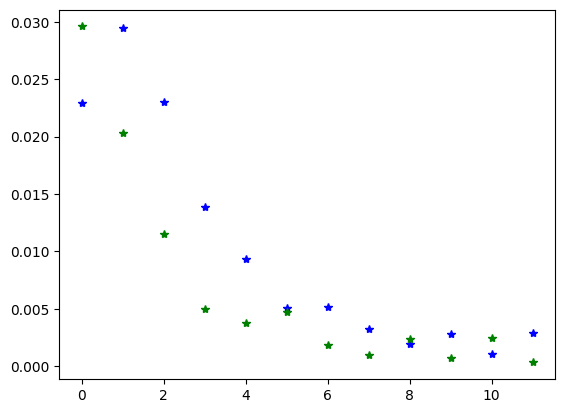

 30%|██████████████████████▏                                                   | 12/40 [00:34<01:09,  2.49s/it]

optimizing for epoch 12
training_step
0 0.0024345966521650553


 32%|████████████████████████                                                  | 13/40 [00:35<00:52,  1.96s/it]

validation_step
0 1.2968335294516464e-09
optimizing for epoch 13
training_step
0 4.987835838798915e-11


 35%|█████████████████████████▉                                                | 14/40 [00:35<00:41,  1.60s/it]

validation_step
0 0.0002636222052387893
optimizing for epoch 14
training_step
0 6.977970042498782e-05


 38%|███████████████████████████▊                                              | 15/40 [00:36<00:33,  1.35s/it]

validation_step
0 0.009023851715028286
optimizing for epoch 15
training_step
0 8.14853748920541e-08
validation_step
0 1.7602467778488062e-05
saving for epoch 15


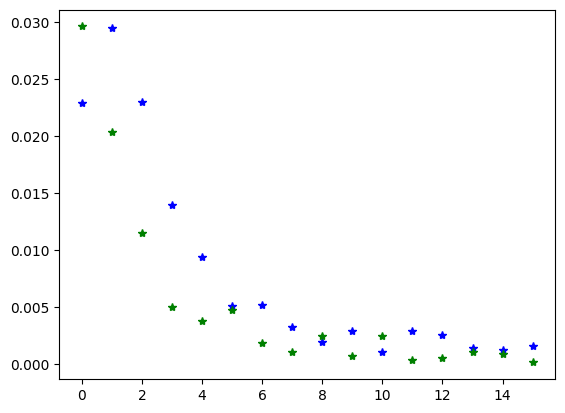

 40%|█████████████████████████████▌                                            | 16/40 [00:40<00:47,  1.98s/it]

optimizing for epoch 16
training_step
0 0.0
validation_step
0 0.000752108870074153
saving for epoch 16


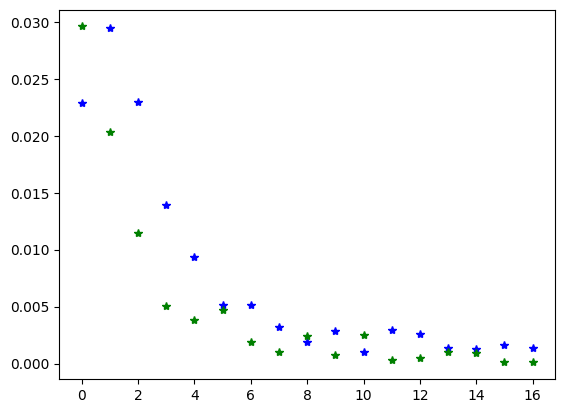

 42%|███████████████████████████████▍                                          | 17/40 [00:43<00:55,  2.40s/it]

optimizing for epoch 17
training_step
0 5.824799245601753e-06
validation_step
0 0.006454028654843569


 45%|█████████████████████████████████▎                                        | 18/40 [00:44<00:42,  1.91s/it]

optimizing for epoch 18
training_step
0 0.006454028654843569


 48%|███████████████████████████████████▏                                      | 19/40 [00:45<00:32,  1.57s/it]

validation_step
0 0.003324163146317005
optimizing for epoch 19
training_step
0 0.0031632196623831987


 50%|█████████████████████████████████████                                     | 20/40 [00:45<00:26,  1.33s/it]

validation_step
0 0.003474119119346142
optimizing for epoch 20
training_step
0 0.0018186953384429216


 52%|██████████████████████████████████████▊                                   | 21/40 [00:46<00:21,  1.16s/it]

validation_step
0 0.0
optimizing for epoch 21
training_step
0 0.0


 52%|██████████████████████████████████████▊                                   | 21/40 [00:47<00:42,  2.26s/it]

validation_step
0 0.0
Early stopped training at epoch 21


In [7]:
import matplotlib.pyplot as plt
early_stop_thresh = 3
nb_epochs = 40

best_loss_val_mean = np.inf
best_epoch = scheduler.last_epoch

for epoch in tqdm(range(nb_epochs)):
    import time
    print(f"optimizing for epoch {epoch}")
    print("training_step")
    loss_train,nb_words_per_batch_train = model_trainer.train_on_epoch()
    print("validation_step")
    loss_val,nb_words_per_batch_val = model_trainer.validate_on_epoch()


    loss_train = np.array([float(el) for el in loss_train])
    loss_val = np.array([float(el) for el in loss_val])
    
    train_weights = np.array(nb_words_per_batch_train)/sum(nb_words_per_batch_train)
    val_weights = np.array(nb_words_per_batch_val)/sum(nb_words_per_batch_val)
    
    
        
    losses_train_and_weights.append([loss_train,train_weights])
    losses_val_and_weights.append([loss_val,val_weights])

    
    current_loss_val_mean = np.mean(loss_val)
    
    if (current_loss_val_mean < best_loss_val_mean) and (epoch-best_epoch<5):
        best_epoch = scheduler.last_epoch
        best_loss_val_mean = current_loss_val_mean

        state_dict_extended = {"model_params":model_trainer.model.state_dict(),
                               "model_inputs":model_inputs,
                              "optimizer":optimizer.state_dict(),
                              "scheduler":scheduler.state_dict()}
        
        torch.save(state_dict_extended,path_model_and_dependencies)
        print(f"saving for epoch {epoch}")

        plt.plot([np.sum(el0*el1) for el0,el1 in losses_train_and_weights],"b*")
        plt.plot([np.sum(el0*el1) for el0,el1 in losses_val_and_weights],"g*")
        plt.show()        
        
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop


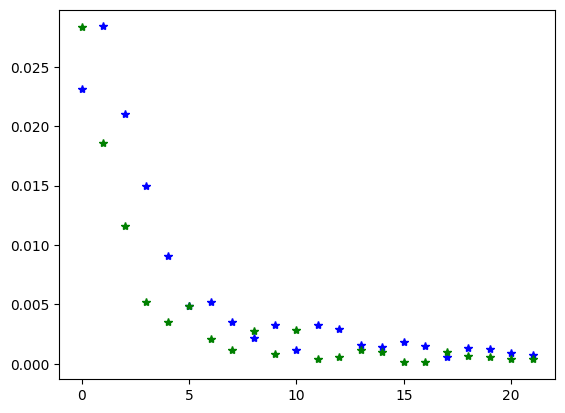

In [9]:
import matplotlib.pyplot as plt
#plt.plot(losses_train,"b*")
plt.plot([np.mean(el) for el,_ in losses_train_and_weights],"b*")
plt.plot([np.mean(el) for el,_ in losses_val_and_weights],"g*")
plt.show()